<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/Logit_Scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logit scale**

Examples of plots with logit axes.

This example visualises how `set_yscale("logit")` works on probability plots by generating three distributions: normal, laplacian, and cauchy in one plot.

The advantage of logit scale is that it effectively spreads out values close to 0 and 1.

In a linear scale plot, probability values near 0 and 1 appear compressed, making it difficult to see differences in those regions.

In a logit scale plot, the transformation expands these regions, making the graph cleaner and easier to compare across different probability values.

This makes the logit scale especially useful when visalising probabilities in logistic regression, classification models, and cumulative distribution functions.

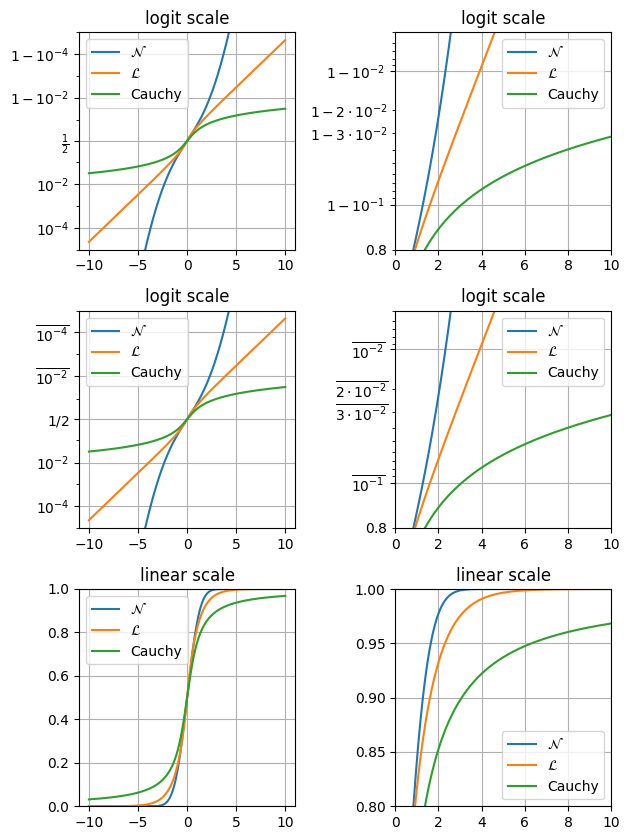

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

xmax = 10
x = np.linspace(-xmax, xmax, 10000)
cdf_norm = [math.erf(w / np.sqrt(2)) / 2 + 1 / 2 for w in x]
cdf_laplacian = np.where(x < 0, 1 / 2 * np.exp(x), 1 - 1 / 2 * np.exp(-x))
cdf_cauchy = np.arctan(x) / np.pi + 1 / 2

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(6.4, 8.5))

# Common part, for the example, we will do the same plots on all graphs
for i in range(3):
    for j in range(2):
        axs[i, j].plot(x, cdf_norm, label=r"$\mathcal{N}$")
        axs[i, j].plot(x, cdf_laplacian, label=r"$\mathcal{L}$")
        axs[i, j].plot(x, cdf_cauchy, label="Cauchy")
        axs[i, j].legend()
        axs[i, j].grid()

# First line, logitscale, with standard notation
axs[0, 0].set(title="logit scale")
axs[0, 0].set_yscale("logit")
axs[0, 0].set_ylim(1e-5, 1 - 1e-5)

axs[0, 1].set(title="logit scale")
axs[0, 1].set_yscale("logit")
axs[0, 1].set_xlim(0, xmax)
axs[0, 1].set_ylim(0.8, 1 - 5e-3)

# Second line, logitscale, with survival notation (with `use_overline`), and
# other format display 1/2
axs[1, 0].set(title="logit scale")
axs[1, 0].set_yscale("logit", one_half="1/2", use_overline=True)
axs[1, 0].set_ylim(1e-5, 1 - 1e-5)

axs[1, 1].set(title="logit scale")
axs[1, 1].set_yscale("logit", one_half="1/2", use_overline=True)
axs[1, 1].set_xlim(0, xmax)
axs[1, 1].set_ylim(0.8, 1 - 5e-3)

# Third line, linear scale
axs[2, 0].set(title="linear scale")
axs[2, 0].set_ylim(0, 1)

axs[2, 1].set(title="linear scale")
axs[2, 1].set_xlim(0, xmax)
axs[2, 1].set_ylim(0.8, 1)

fig.tight_layout()
plt.show()